## Imports

In [2]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Data loading

10
test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


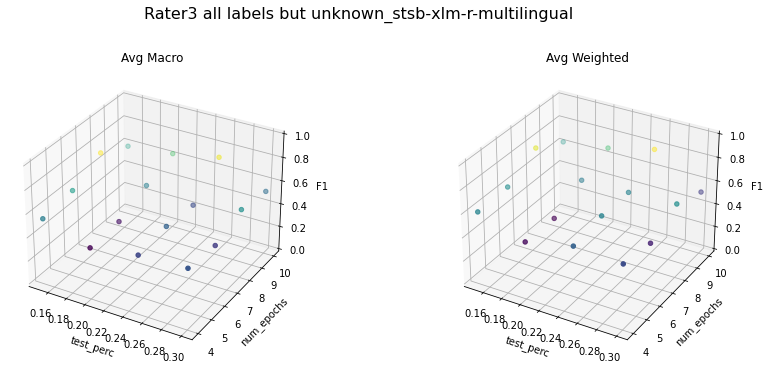

test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

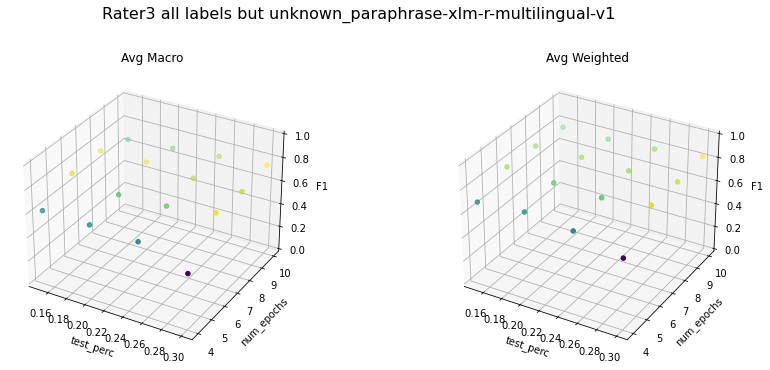

11
test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

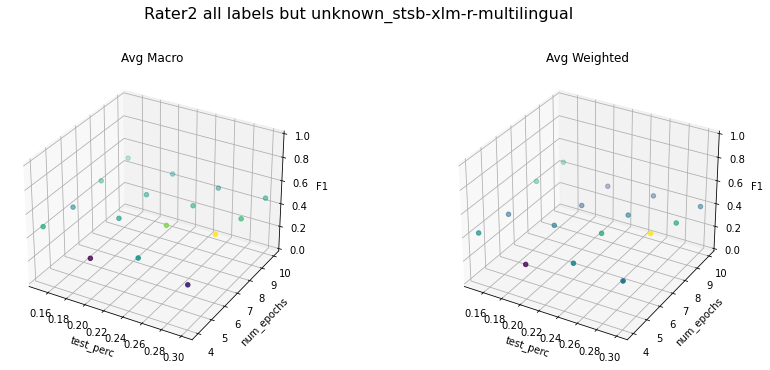

test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

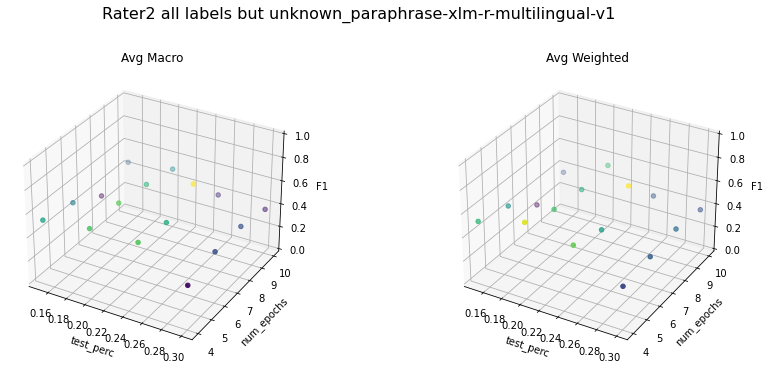

12
test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

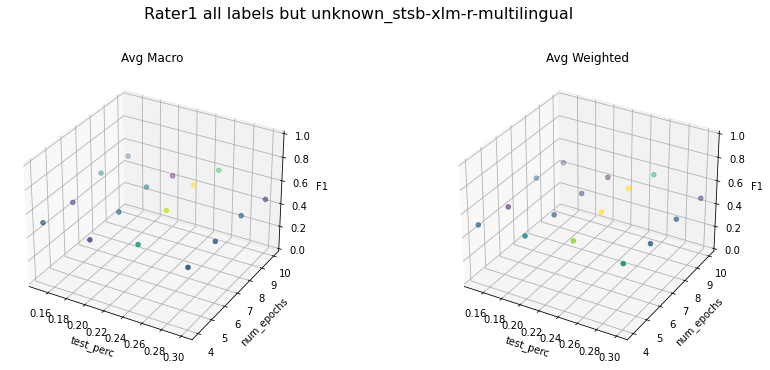

test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

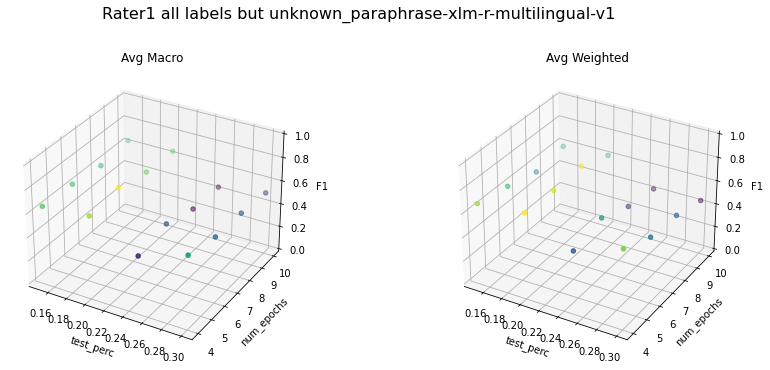

13
test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

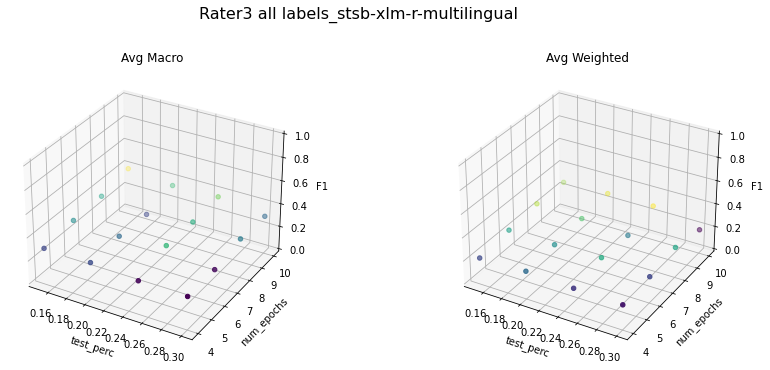

test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

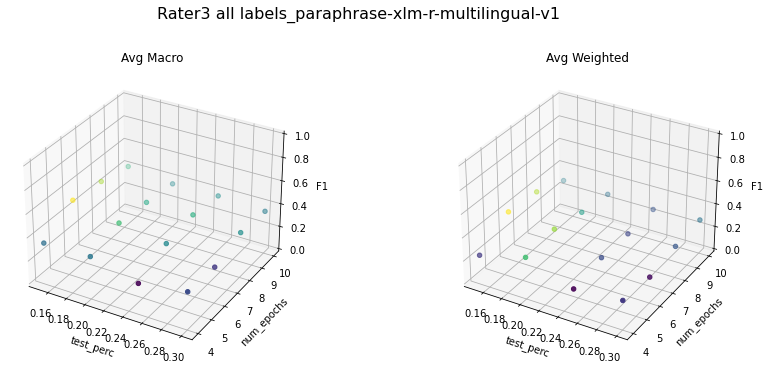

14
test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

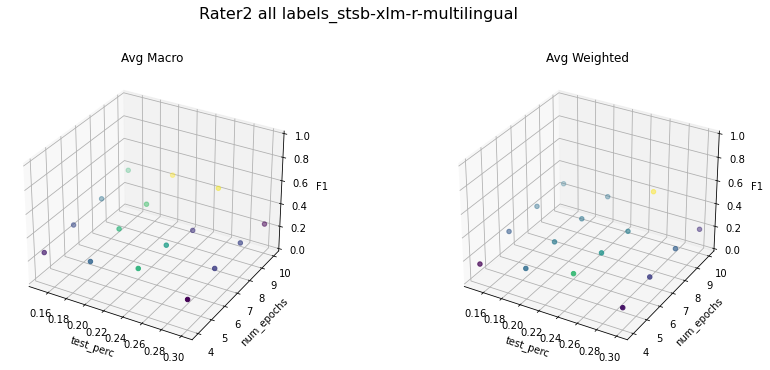

test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

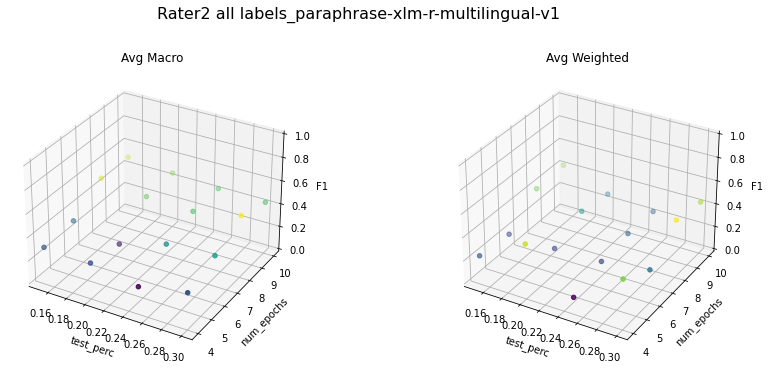

15
test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

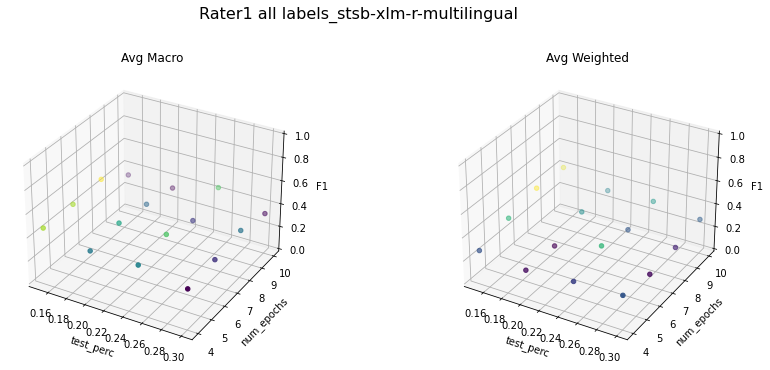

test_perc=0.15
test_perc=0.2
test_perc=0.25
test_perc=0.3


<Figure size 432x288 with 0 Axes>

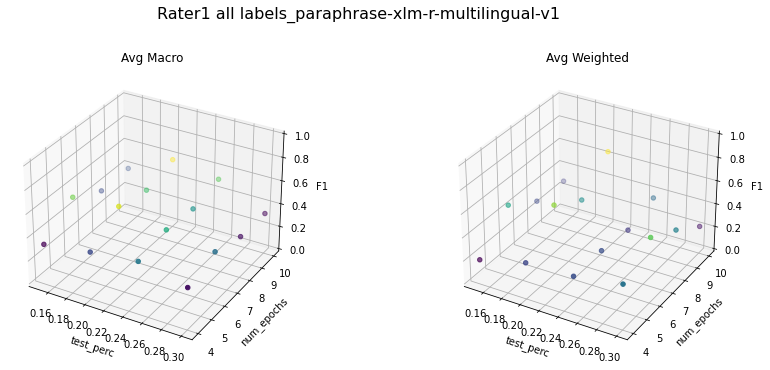

1
2
3
4
5
6


<Figure size 432x288 with 0 Axes>

In [29]:
# path = Path("C:/Users/user/Google Drive/Els_meus_documents/projectes/CompetitiveIntelligence/WRI/Notebooks/Data/finetuningResults")
# filename = "FineTuningResults.json"

sub_path = Path("C:/Users/user/Google Drive/Els_meus_documents/projectes/CompetitiveIntelligence/WRI/Notebooks/Data/finetuningResults/")
paths = sub_path.glob('*.json')

models = ["stsb-xlm-r", "paraphrase-xlm-r"]#"distiluse-base", "quora-distilbert", 

exp_codes = {'10' : "Rater3 all labels but unknown",
            '11' : "Rater2 all labels but unknown",
            '12' : "Rater1 all labels but unknown",
            '13' : "Rater3 all labels",
            '14' : "Rater2 all labels",
            '15' : "Rater1 all labels"}
for path in paths:
    # because path is object not string
    path_in_str = str(path)
    exp_number = path_in_str.split("EXP")[1].split("_")[0]
    print(exp_number)
#     print(path_in_str)
    if int(exp_number) > 9:
        with open(path_in_str, "r") as f:
            F1 = json.load(f)
        plot_F1(transform_data(F1), exp_number, exp_codes, sub_path)

In [28]:
def plot_F1(F1, expcode, expcodes, save_path):
    for model, M_results in F1.items():
        x = []; y = []; z1 = []; z2 = []

    #     fig, axs = plt.subplots(1, 2, figsize = (13,5))
        fig = plt.figure(figsize = (13,6))    
        ax1 = fig.add_subplot(121, projection='3d'); ax2 = fig.add_subplot(122, projection='3d')

        for test_perc, T_results in M_results.items():
            print(test_perc)
            perc = test_perc.split("=")[1]
            for item in T_results:
                x.append(float(perc)); y.append(item['num_epochs']);z1.append(item['avg_f1'][0]); z2.append(item['avg_f1'][1])
        fig.suptitle(expcodes[expcode]+ "_" + model, fontsize=16)
        ax1.set_zlim(0, 1); ax2.set_zlim(0, 1)
        ax1.set_xlabel('test_perc'); ax2.set_xlabel('test_perc')
        ax1.set_ylabel('num_epochs'); ax2.set_ylabel('num_epochs')
        ax1.set_zlabel('F1'); ax2.set_zlabel('F1')
        ax1.set_title('Avg Macro'); ax2.set_title('Avg Weighted')
        fig.subplots_adjust(wspace=0.5)
        ax1.scatter3D(np.array(x), np.array(y), np.array(z1), c=np.array(z1), cmap='viridis')
        ax2.scatter3D(np.array(x), np.array(y), np.array(z2), c=np.array(z2), cmap='viridis')

        plt.show()
        plt.savefig(save_path / (expcodes[expcode]+ "_" + model))

def transform_data(dictionary):
    new_dict = {}
    for key, value in dictionary.items():
        for model, T_results in value.items():
            if model in new_dict:
                new_dict[model][key] = T_results
            else:
                new_dict[model] = {}
                new_dict[model][key] = T_results
            
    return new_dict
    
  

In [ ]:
X